In [1]:
import pandas as pd
from dora.api import DataExplorer
explorer = DataExplorer()

seasonal = explorer.products.seasonalOrderDistribution()
import numpy as np
%matplotlib inline

In [2]:
columns = ['asin','productids','spring','summer','fall','winter']
seasons = ['spring','summer','fall','winter']

In [3]:
df = pd.DataFrame(seasonal.results, columns=columns)
df[seasons] = df[seasons].astype(float)

In [4]:
#seasonal.to_pandas()

In [5]:
df[df['asin']=='0000041696']

,asin,productids,spring,summer,fall,winter
2248,0000041696,10007,309.0,136.0,66.0,2035.0


In [6]:
df[seasons] = df[seasons].div(df[seasons].sum(axis=1), axis=0).multiply(100)

In [7]:
df.head()

,asin,productids,spring,summer,fall,winter
0,0002233916,10501,50.000000,0.000000,50.000000,0.000000
1,0002157977,10295,53.846154,23.076923,7.692308,15.384615
2,0006385478,11523,50.000000,0.000000,50.000000,0.000000
3,000638661X,11534,28.571429,28.571429,14.285714,28.571429
4,0006550800,11890,0.000000,100.000000,0.000000,0.000000


In [8]:
df[df['asin']=='0000041696']

,asin,productids,spring,summer,fall,winter
2248,0000041696,10007,12.136685,5.341712,2.592302,79.929301


In [9]:
bins = np.arange(0.0, 101.0, 10.0)
group_names = [chr(c) for c in range(ord('a'), ord('j')+1)]

In [10]:
df2 = df[seasons]

In [11]:
df2.head()

,spring,summer,fall,winter
0,50.000000,0.000000,50.000000,0.000000
1,53.846154,23.076923,7.692308,15.384615
2,50.000000,0.000000,50.000000,0.000000
3,28.571429,28.571429,14.285714,28.571429
4,0.000000,100.000000,0.000000,0.000000


In [12]:
seasoncounts = dict()

for i in seasons:
    categories = pd.cut(df2[i], bins, labels=group_names)
    seasoncounts.update({i:categories.replace(np.nan, 'a', regex=True)})

In [13]:
seasoncounts['spring'].values[:5]

[e, f, e, c, a]
Categories (10, object): [a < b < c < d ... g < h < i < j]

In [14]:
df2 = pd.DataFrame(seasoncounts, columns=seasons)

In [15]:
season_dist = dict()

for s in seasons:
    season_dist.update({s:pd.value_counts(df2[s])})

In [16]:
df3 = pd.DataFrame(season_dist)

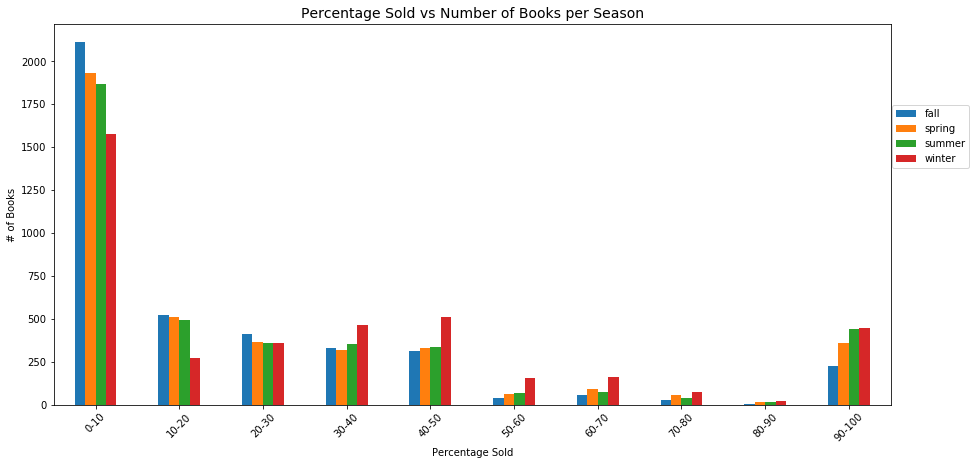

In [17]:
ax = df3.plot(kind='bar',stacked=False,figsize=(15, 7))
ax.set_xlabel("Percentage Sold")
ax.set_ylabel("# of Books")
ax.set_xticklabels(('0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'),rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 0.8))
ax.set_title('Percentage Sold vs Number of Books per Season', fontsize=14);